# Imports + Dados

In [1]:
%%capture
!gdown --id 1x2XIewHy4FAcZmPrKXJ1kqzSQsOArug5 # Air Passengers
!gdown --id 1x3pqL_Y_FwgnPk0jZYXPRW1JGuVCxfVm # Month Value

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
df_sinal = pd.read_csv('/content/signal_1.csv')
df_sinal.head()

,sinal
0,-38.0
1,-40.0
2,-39.0
3,-40.0
4,-40.0


In [4]:
df_passageiros = pd.read_csv('/content/AirPassengers.csv')
df_passageiros.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df_month_value = pd.read_csv('/content/Month_Value_1.csv')
df_month_value.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


# Passageiros
Compra de passagens por mês

In [6]:
x = df_passageiros['Month']
y = df_passageiros['#Passengers']

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines+markers',
                    name='lines+markers'))

fig.show()

## Decomposição

In [7]:
df_passageiros.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



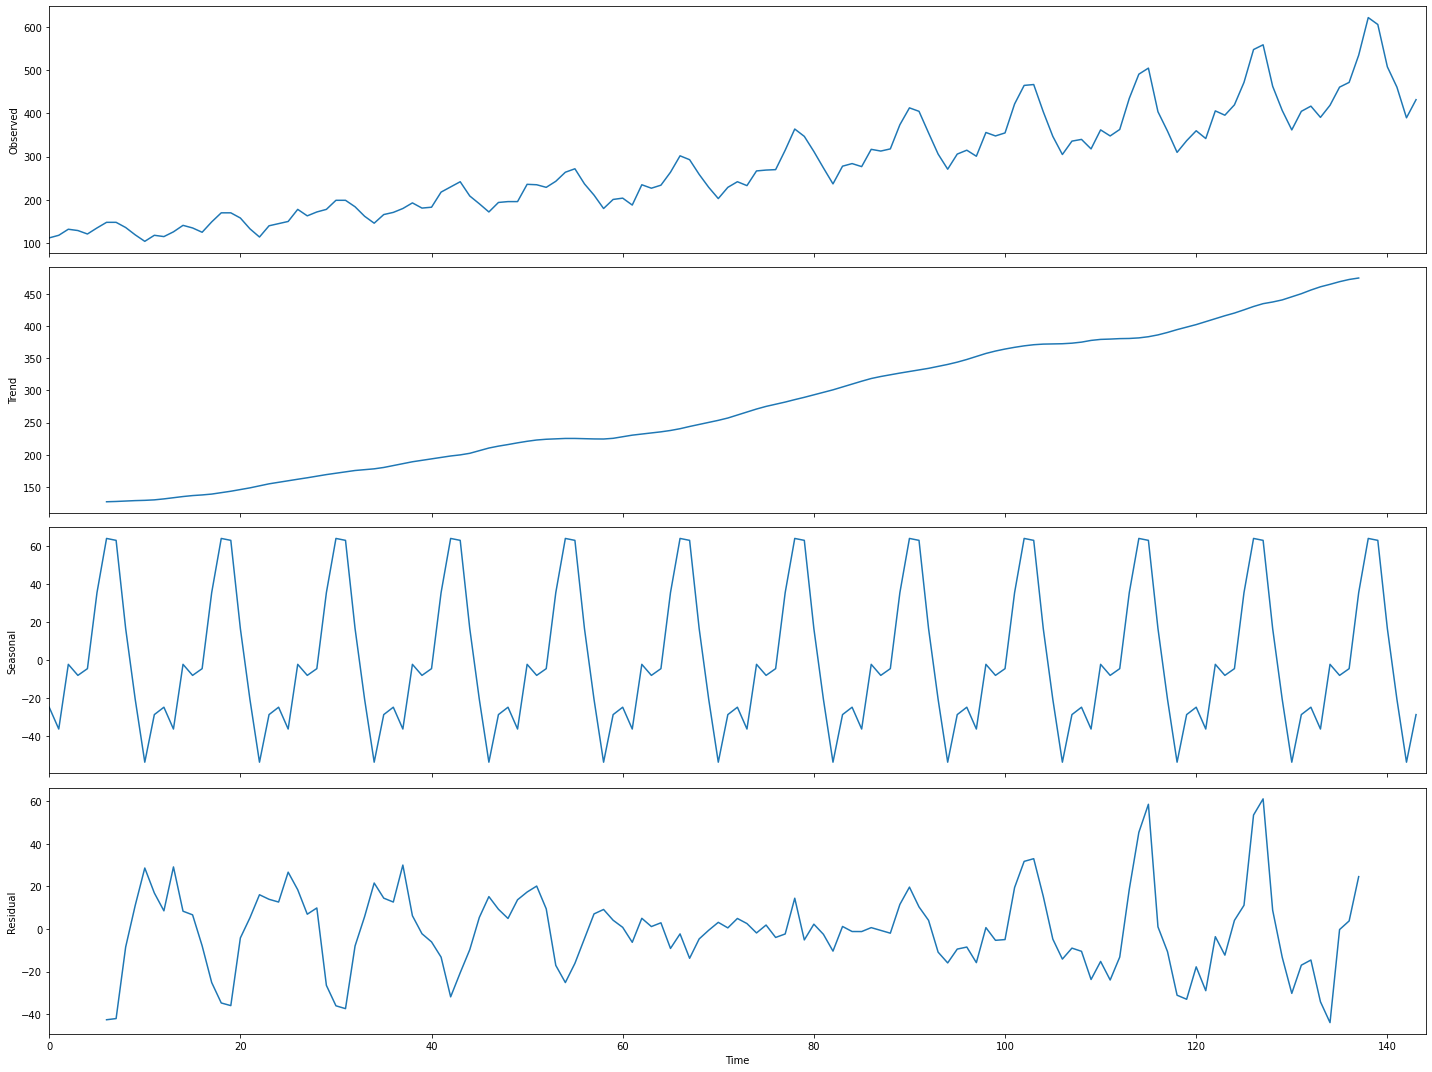

In [10]:
# .values pega o Array
resultado_decomposicao_adicao = seasonal_decompose(df_passageiros['#Passengers'].values, model = 'additive', freq = 12)

plt.rcParams.update({'figure.figsize': (20, 15)})
resultado_decomposicao_adicao.plot().show()

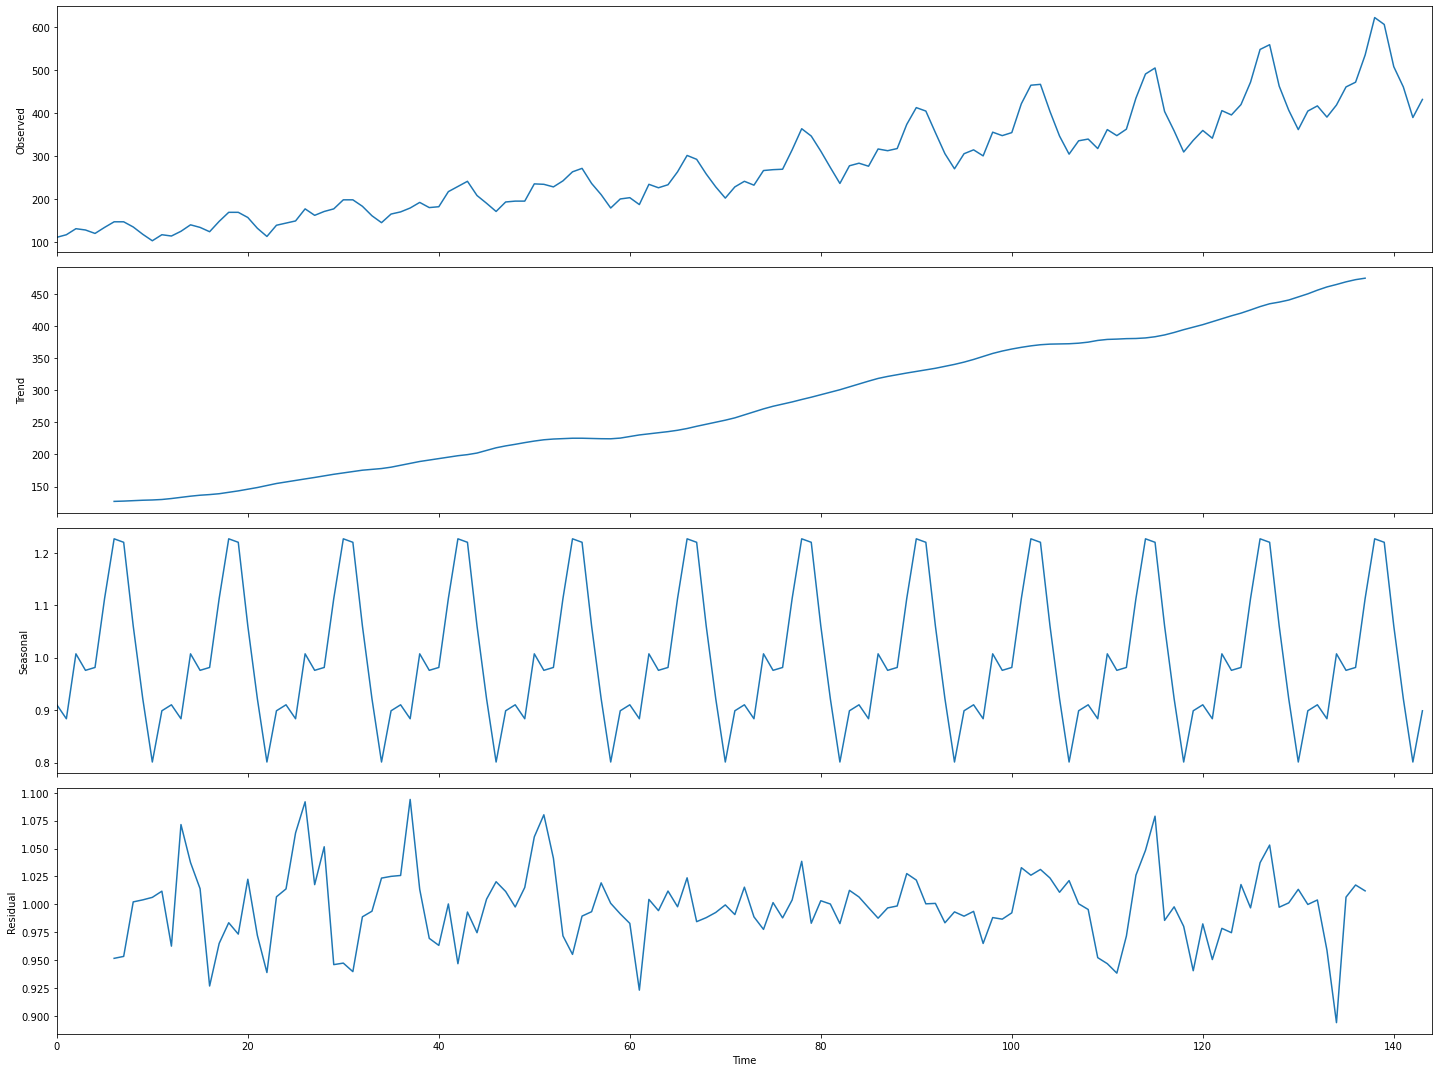

In [11]:
resultado_decomposicao_multiplicacao = seasonal_decompose(df_passageiros['#Passengers'].values, model = 'multiplicative', freq = 12)

plt.rcParams.update({'figure.figsize': (20, 15)})
resultado_decomposicao_multiplicacao.plot().show()

## Introdução a RNN

In [12]:
n_treino = 105
time_steps = 12 #Usado no exemplo em aula

df_train_set = df_passageiros['#Passengers'][:105]

# Necessito que no meu conjunto de teste, esteja contido parte do meu treino
df_test_set = df_passageiros['#Passengers'][n_treino - time_steps:] 

In [13]:
df_train_set[-5:]

100    355
101    422
102    465
103    467
104    404
Name: #Passengers, dtype: int64

In [14]:
df_test_set[:5]

93    306
94    271
95    306
96    315
97    301
Name: #Passengers, dtype: int64

## Treino e Teste

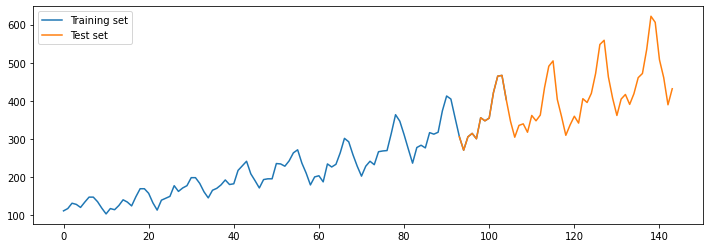

In [15]:
#Grafico
df_train_set.plot( figsize=(12,4), legend=True )
df_test_set.plot(legend=True)
plt.legend( ['Training set' , 'Test set' ] )

## Normalização

In [16]:
train_array = df_train_set.values
test_array = df_test_set.values

In [17]:
train_set = train_array.reshape(-1, 1)
test_set = test_array.reshape(-1, 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler( feature_range = (0,1) )

train_set_norm = sc.fit_transform(train_set)
test_set_norm = sc.transform(test_set)

### Explicação do Reshape
Vamos conversar sobre esse Reshape

In [19]:
array_temp = train_array

In [20]:
array_temp.size

105

In [21]:
array_temp[0], array_temp[104]

(112, 404)

In [22]:
array_temp[-1]

404

In [23]:
array_temp.shape

(105,)

In [24]:
# Tudo o que era coluna, vira linha em 1 coluna somente. (Igual ao exemplo usado -> -1 / 1)
array_temp.reshape(array_temp.size, 1)

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

## Criando o X

In [25]:
n_samples = train_set.size

x_train = []
y_train = []

for i in range( time_steps, n_samples ):
                                # linhas              # colunas
  x_train.append( train_set_norm[ (i - time_steps):i , 0 ]  )
  y_train.append( train_set_norm[ i,0] )

x_train = np.array(x_train)
y_train = np.array(y_train)

In [26]:
n_samples = test_set_norm.size

x_test = []
y_test = []

for i in range( time_steps, n_samples ):
                                # linhas              # colunas
    x_test.append( test_set_norm[ (i - time_steps):i , 0 ]  )
    y_test.append( test_set_norm[ i,0] )

x_test = np.array(x_test)
y_test = np.array(y_test)

In [27]:
#x_train_alternative = []
#y_train_alternative = []

#for j in range(time_steps, n_samples):
  #x_train_alternative.append(df_passageiros['#Passengers'].iloc[(j - time_steps):j].values)
  #y_train_alternative.append(df_passageiros['#Passengers'].iloc[j])

#x_train = np.array(x_train_alternative)
#y_train = np.array(y_train_alternative)

In [28]:
#x_test = []
#y_test = []

#n_samples = df_test_set.shape[0]

#for j in range( time_steps, n_samples ):
  #  x_test.append(df_test_set.iloc[(j - time_steps):j].values)
  #  y_test.append(df_test_set.iloc[j])

#x_test = np.array(x_test)
#y_test = np.array(y_test)

## Entrada 3D

Minhas outras features devem seguir o mesmo padrão da principal (caso eu tenha)

Shape -> (n_samples, time_steps, n_features)

In [29]:
x_train.shape

(93, 12)

In [30]:
n_features = 1 # Nesse caso em específico

x_train_3D = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_features))
x_test_3D = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_features))

## LSTM (Long Short Term Memory)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#Estrutra da rede

regressor = Sequential()

regressor.add( LSTM(units = 120, input_shape =  (time_steps, n_features), return_sequences = True) )
regressor.add( Dropout(0.05) )
regressor.add( LSTM(units = 120) )
regressor.add( Dropout(0.05) )
regressor.add(Dense(units = 1))

regressor.compile( optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'] )

history = regressor.fit(x_train_3D, y_train, batch_size = 32, epochs = 250, validation_data = (x_test_3D, y_test) )

Epoch 1/250
3/3 [==============================] - 5s 517ms/step - loss: 0.1541 - mse: 0.1541 - mae: 0.3255 - val_loss: 0.2426 - val_mse: 0.2426 - val_mae: 0.4468
Epoch 2/250
3/3 [==============================] - 0s 46ms/step - loss: 0.0276 - mse: 0.0276 - mae: 0.1179 - val_loss: 0.0953 - val_mse: 0.0953 - val_mae: 0.2809
Epoch 3/250
3/3 [==============================] - 0s 46ms/step - loss: 0.0358 - mse: 0.0358 - mae: 0.1678 - val_loss: 0.0557 - val_mse: 0.0557 - val_mae: 0.2122
Epoch 4/250
3/3 [==============================] - 0s 47ms/step - loss: 0.0156 - mse: 0.0156 - mae: 0.1005 - val_loss: 0.0695 - val_mse: 0.0695 - val_mae: 0.1884
Epoch 5/250
3/3 [==============================] - 0s 47ms/step - loss: 0.0202 - mse: 0.0202 - mae: 0.0985 - val_loss: 0.1024 - val_mse: 0.1024 - val_mae: 0.2471
Epoch 6/250
3/3 [==============================] - 0s 43ms/step - loss: 0.0228 - mse: 0.0228 - mae: 0.1060 - val_loss: 0.0693 - val_mse: 0.0693 - val_mae: 0.1883
Epoch 7/250
3/3 [==========

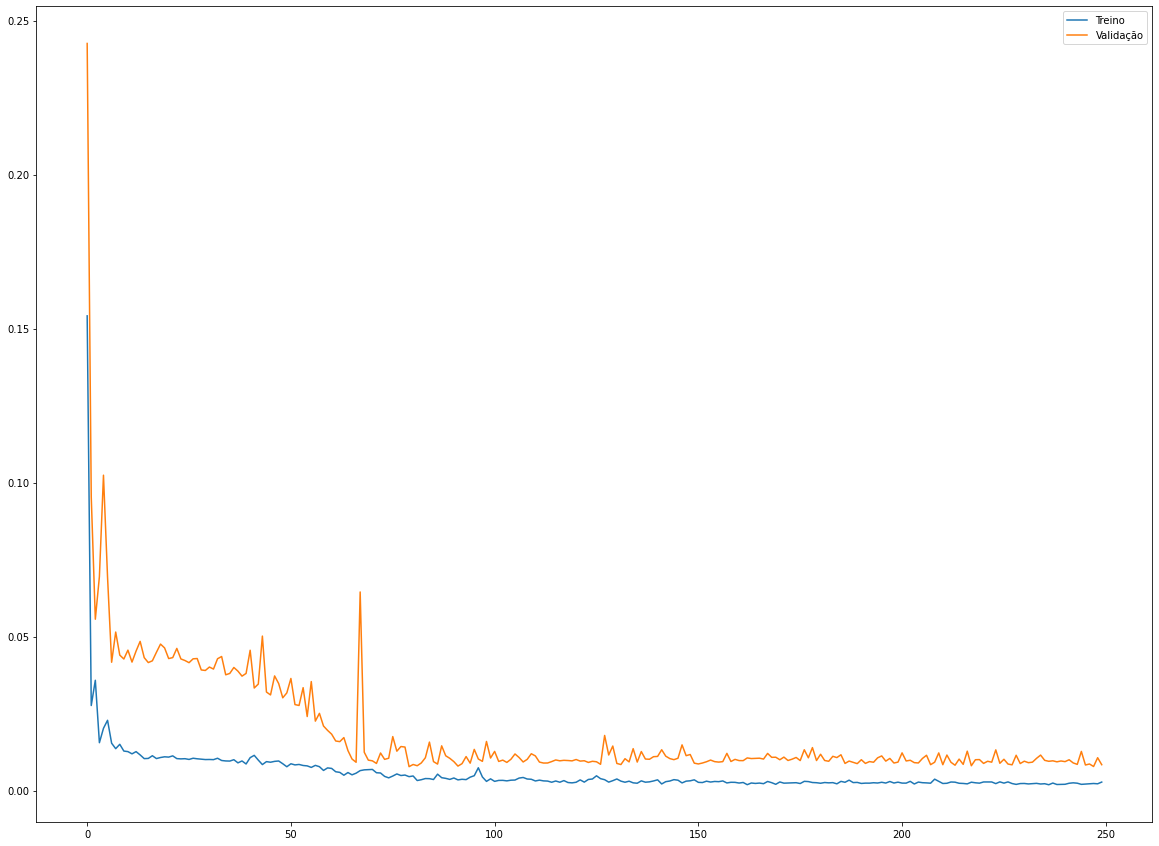

In [32]:
plt.plot( history.history['loss'], label = "Treino" )
plt.plot( history.history['val_loss'], label = "Validação" )
plt.legend()

In [33]:
y_predict = regressor.predict(x_test_3D)
y_predict[:10]

array([[0.72552127],
       [0.65261686],
       [0.63746214],
       [0.60937977],
       [0.6117369 ],
       [0.6697905 ],
       [0.71540046],
       [0.80114   ],
       [0.91583836],
       [1.0045904 ]], dtype=float32)

In [34]:
#plt.plot(y_test, color='red',label='Real')

In [35]:
x = df_passageiros['Month'][-len(y_test):]
y_real = y_test
y_pred = y_predict.reshape(len(y_test),)

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x = x, y = y_real,

                    mode='lines+markers',

                    name='Real'))

fig.add_trace(go.Scatter(x = x, y = y_pred,

                    mode='lines+markers',

                    name='Previsão'))

fig.show()

## Utilizando Decomposição

## Decompondo e Treinando - Sazonalidade

In [37]:
resultado_dec_mul = seasonal_decompose(df_passageiros['#Passengers'].values , model='multiplicative', freq = 12 )

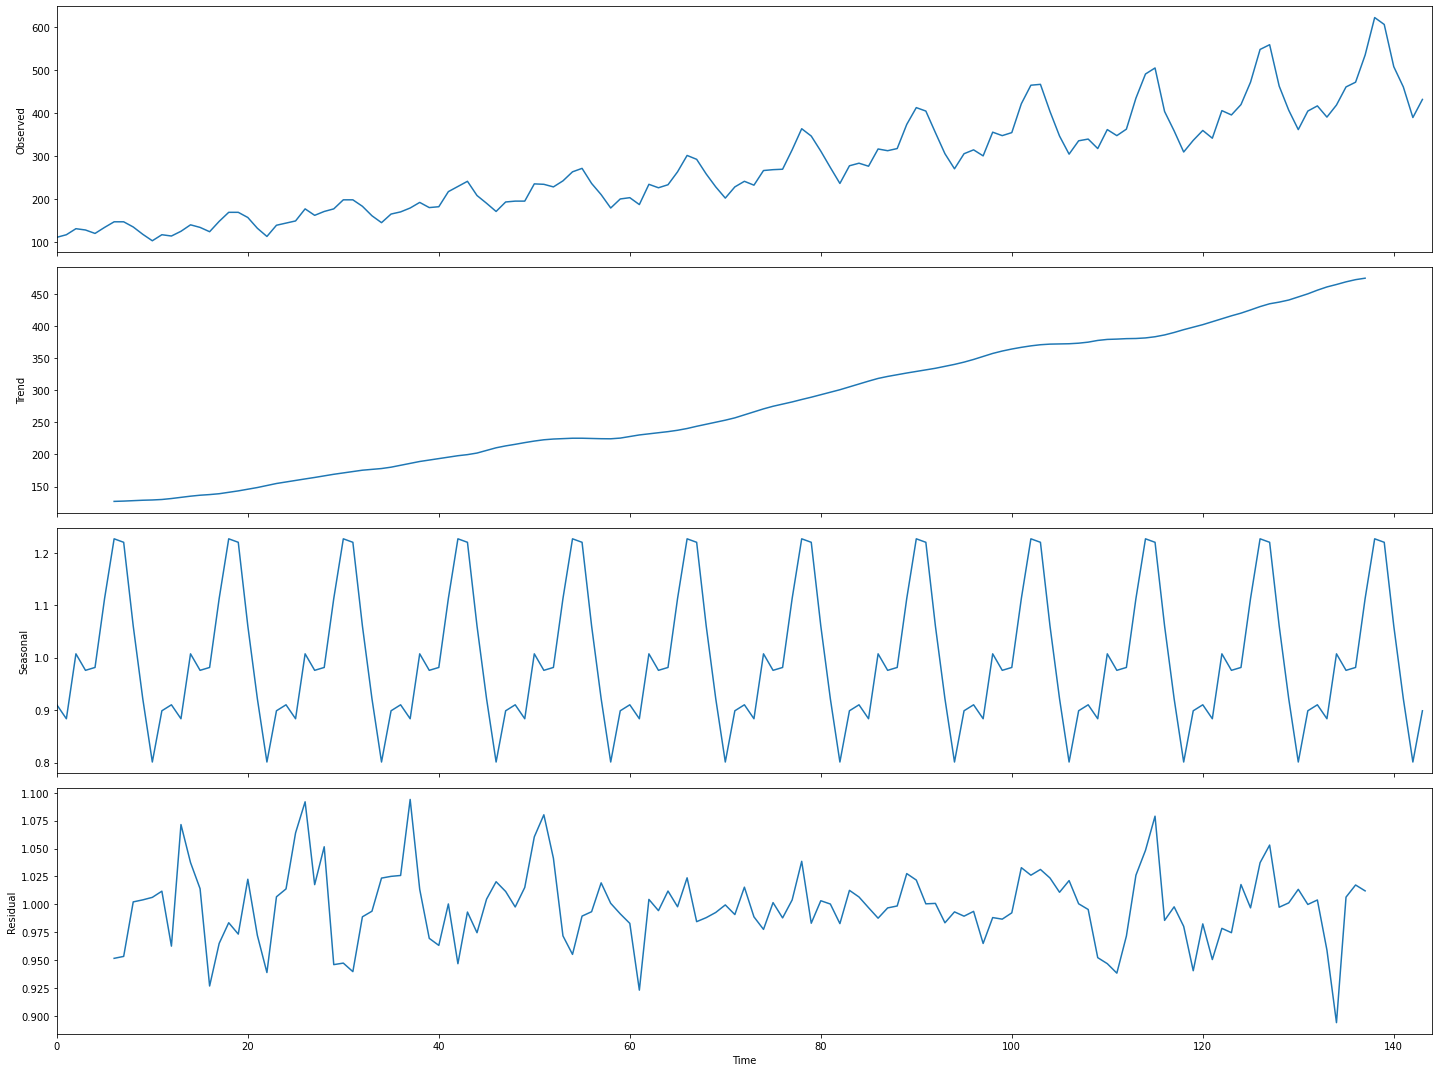

In [38]:
plt.rcParams.update({'figure.figsize': (20, 15)})
resultado_dec_mul.plot().show()

In [39]:
df_pass_dec_seasonal = pd.Series(data = resultado_dec_mul.seasonal, name = 'seasonal')

In [40]:
#dropando 5 primeiros e 5 ultimos pro shape bater com tendencia e residual
df_pass_dec_seasonal = df_pass_dec_seasonal[:-6]
df_pass_dec_seasonal = df_pass_dec_seasonal[6:]
df_pass_dec_seasonal.shape

(132,)

In [41]:
time_steps = 4
n_treino = 105
df_treino_set_saz = df_pass_dec_seasonal[:n_treino]
df_teste_set_saz = df_pass_dec_seasonal[ n_treino - time_steps:]

In [42]:
df_teste_set_saz.shape

(31,)

In [43]:
df_treino_set_saz[-5:]

106    0.801178
107    0.898824
108    0.910230
109    0.883625
110    1.007366
Name: seasonal, dtype: float64

In [44]:
df_teste_set_saz[:5]

107    0.898824
108    0.910230
109    0.883625
110    1.007366
111    0.975906
Name: seasonal, dtype: float64

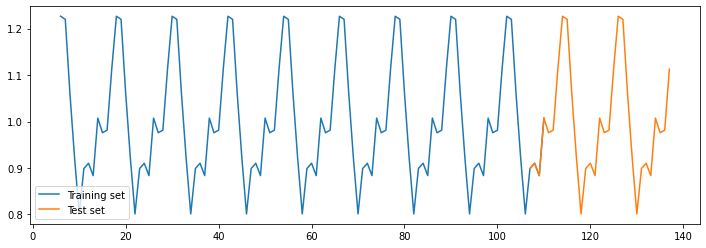

In [45]:
#Grafico
df_treino_set_saz.plot( figsize=(12,4), legend=True )
df_teste_set_saz.plot(legend=True)
plt.legend( ['Training set' , 'Test set' ] )

In [46]:
treino_array_saz = df_treino_set_saz.values
teste_array_saz = df_teste_set_saz.values

In [47]:
treino_set_saz = treino_array_saz.reshape(-1, 1)
teste_set_saz = teste_array_saz.reshape(-1, 1)

In [48]:
from sklearn.preprocessing import MinMaxScaler

sc =  MinMaxScaler( feature_range=(0,1) )

treino_set_norm_saz = sc.fit_transform(treino_set_saz)
teste_set_norm_saz = sc.transform(teste_set_saz)

In [49]:
n_samples = treino_set_saz.size

x_treino_saz = []
y_treino_saz = []

for i in range( time_steps, n_samples ):
                                # linhas              # colunas
    x_treino_saz.append( treino_set_norm_saz[ (i - time_steps):i , 0 ]  )
    y_treino_saz.append( treino_set_norm_saz[ i, 0] )

x_treino_saz = np.array(x_treino_saz)
y_treino_saz = np.array(y_treino_saz)

In [50]:
n_samples = teste_set_norm_saz.size

x_teste_saz = []
y_teste_saz = []

for i in range( time_steps, n_samples ):
                                # linhas              # colunas
    x_teste_saz.append( teste_set_norm_saz[ (i - time_steps):i , 0 ]  )
    y_teste_saz.append( teste_set_norm_saz[ i,0] )

x_teste_saz = np.array(x_teste_saz)
y_teste_saz = np.array(y_teste_saz)

In [51]:
n_features = 1
x_treino_3D_saz = np.reshape( x_treino_saz, (x_treino_saz.shape[0], x_treino_saz.shape[1], n_features) )
x_teste_3D_saz = np.reshape( x_teste_saz, (x_teste_saz.shape[0], x_teste_saz.shape[1], n_features) )
x_treino_3D_saz.shape

(101, 4, 1)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

call_es = EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)

# Estrutura da nossa rede
regressor = Sequential()
regressor.add( LSTM(units = 120, return_sequences = True, input_shape= (time_steps, n_features)))
regressor.add( Dropout(0.05) )
regressor.add( LSTM( units = 120 ) )
regressor.add( Dropout(0.05) )
regressor.add( Dense(units=1) )

regressor.compile( optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'] )

historico = regressor.fit( x_treino_3D_saz, y_treino_saz, batch_size = 16, epochs = 250, validation_data=(x_teste_3D_saz, y_teste_saz), callbacks = [call_es])

Epoch 1/250
7/7 [==============================] - 5s 184ms/step - loss: 0.2328 - mse: 0.2328 - mae: 0.3973 - val_loss: 0.1443 - val_mse: 0.1443 - val_mae: 0.3062
Epoch 2/250
7/7 [==============================] - 0s 18ms/step - loss: 0.1351 - mse: 0.1351 - mae: 0.2971 - val_loss: 0.1178 - val_mse: 0.1178 - val_mae: 0.2636
Epoch 3/250
7/7 [==============================] - 0s 18ms/step - loss: 0.1228 - mse: 0.1228 - mae: 0.2782 - val_loss: 0.1002 - val_mse: 0.1002 - val_mae: 0.2561
Epoch 4/250
7/7 [==============================] - 0s 17ms/step - loss: 0.1089 - mse: 0.1089 - mae: 0.2681 - val_loss: 0.1007 - val_mse: 0.1007 - val_mae: 0.2563
Epoch 5/250
7/7 [==============================] - 0s 18ms/step - loss: 0.1005 - mse: 0.1005 - mae: 0.2566 - val_loss: 0.0912 - val_mse: 0.0912 - val_mae: 0.2411
Epoch 6/250
7/7 [==============================] - 0s 18ms/step - loss: 0.0986 - mse: 0.0986 - mae: 0.2510 - val_loss: 0.0876 - val_mse: 0.0876 - val_mae: 0.2276
Epoch 7/250
7/7 [==========

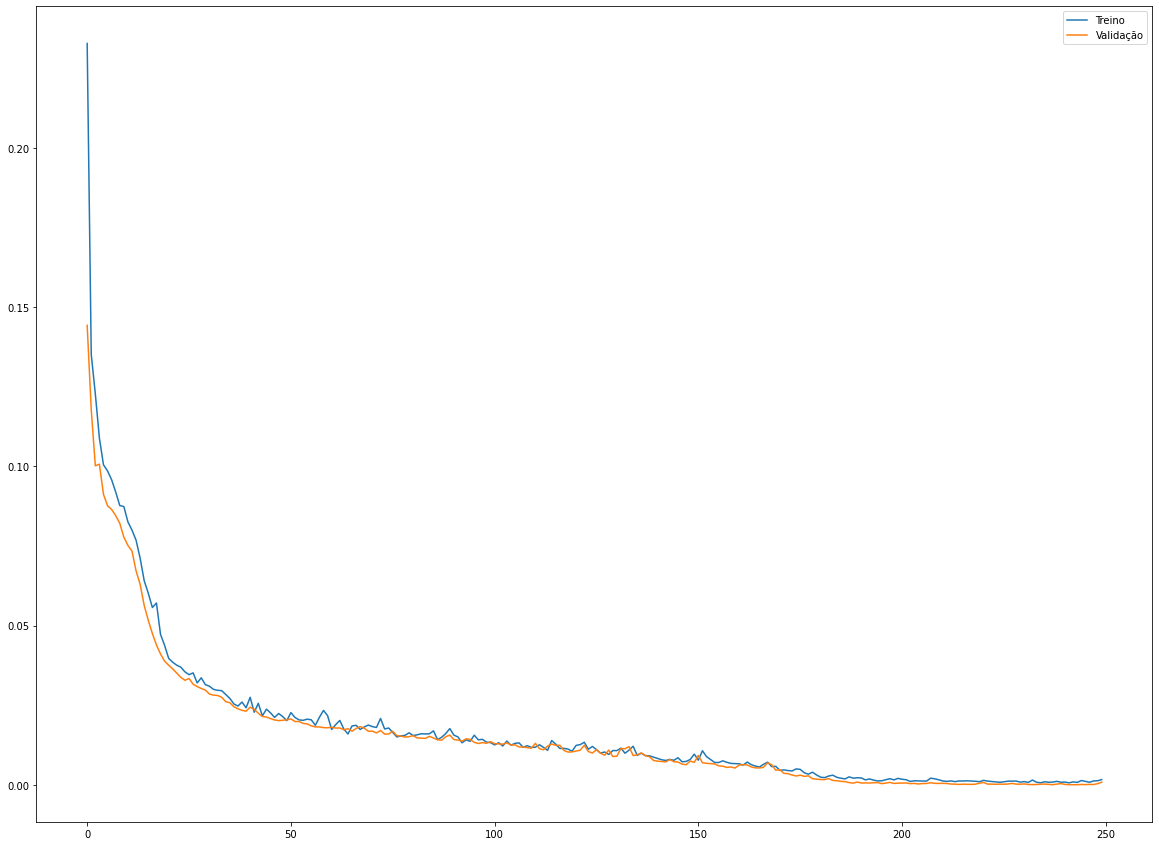

In [53]:
plt.plot( historico.history['loss'], label ="Treino" )
plt.plot( historico.history['val_loss'], label ="Validação" )
plt.legend()

In [54]:
y_predict_saz = regressor.predict(x_teste_3D_saz)

x = df_passageiros['Month'][-len(y_teste_saz):]
y_real = y_teste_saz
y_pred = y_predict_saz.reshape(len(y_teste_saz),)
# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y_real,
                    mode='lines+markers',
                    name='Real'))

fig.add_trace(go.Scatter(x=x, y=y_pred,
                    mode='lines+markers',
                    name='Previsão'))

fig.show()

## Decompondo e Treinando - Tendência

In [55]:
df_pass_dec_trend = pd.Series(data = resultado_dec_mul.trend, name = 'trend')

In [56]:
df_pass_dec_trend[-10:]

134    465.208333
135    469.333333
136    472.750000
137    475.041667
138           NaN
139           NaN
140           NaN
141           NaN
142           NaN
143           NaN
Name: trend, dtype: float64

In [57]:
#preenchendo com valores médios ao inves de dropar
#df_pass_dec_trend = df_pass_dec_trend.fillna(df_pass_dec_trend.mean())

In [58]:
#Dropando valores nulos
df_pass_dec_trend.dropna(inplace = True)
df_pass_dec_trend.unique()

array([126.79166667, 127.25      , 127.95833333, 128.58333333,
       129.        , 129.75      , 131.25      , 133.08333333,
       134.91666667, 136.41666667, 137.41666667, 138.75      ,
       140.91666667, 143.16666667, 145.70833333, 148.41666667,
       151.54166667, 154.70833333, 157.125     , 159.54166667,
       161.83333333, 164.125     , 166.66666667, 169.08333333,
       171.25      , 173.58333333, 175.45833333, 176.83333333,
       178.04166667, 180.16666667, 183.125     , 186.20833333,
       189.04166667, 191.29166667, 193.58333333, 195.83333333,
       198.04166667, 199.75      , 202.20833333, 206.25      ,
       210.41666667, 213.375     , 215.83333333, 218.5       ,
       220.91666667, 222.91666667, 224.08333333, 224.70833333,
       225.33333333, 224.95833333, 224.58333333, 224.45833333,
       225.54166667, 228.        , 230.45833333, 232.25      ,
       233.91666667, 235.625     , 237.75      , 240.5       ,
       243.95833333, 247.16666667, 250.25      , 253.5 

In [59]:
time_steps = 4
n_treino = 105
df_treino_trend_set = df_pass_dec_trend[:n_treino]
df_teste_trend_set = df_pass_dec_trend[ n_treino - time_steps:]

In [60]:
df_teste_trend_set.shape

(31,)

In [61]:
df_teste_set_saz.shape

(31,)

In [62]:
df_treino_trend_set[-5:]

106    372.750000
107    373.625000
108    375.250000
109    377.916667
110    379.500000
Name: trend, dtype: float64

In [63]:
df_teste_trend_set[:5]

107    373.625000
108    375.250000
109    377.916667
110    379.500000
111    380.000000
Name: trend, dtype: float64

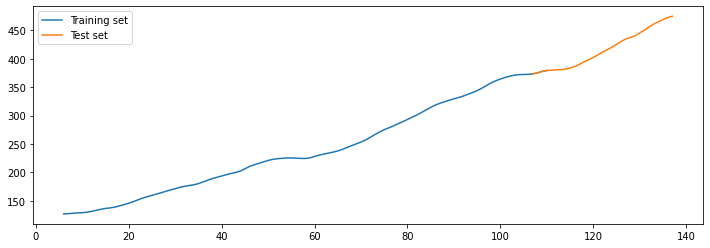

In [64]:
#Grafico
df_treino_trend_set.plot( figsize=(12,4), legend=True )
df_teste_trend_set.plot(legend=True)
plt.legend( ['Training set' , 'Test set' ] )

In [65]:
treino_trend_array = df_treino_trend_set.values
teste_trend_array = df_teste_trend_set.values

In [66]:
treino_trend_set = treino_trend_array.reshape(-1, 1)
teste_trend_set = teste_trend_array.reshape(-1, 1)

In [67]:
from sklearn.preprocessing import MinMaxScaler

sc =  MinMaxScaler( feature_range = (0, 1) )

treino_trend_set_norm = sc.fit_transform(treino_trend_set)
teste_trend_set_norm = sc.transform(teste_trend_set)

In [68]:
n_samples = treino_trend_set.size

x_treino_trend = []
y_treino_trend = []

for i in range( time_steps, n_samples ):
                                # linhas              # colunas
    x_treino_trend.append( treino_trend_set_norm[ (i - time_steps):i , 0 ]  )
    y_treino_trend.append( treino_trend_set_norm[ i, 0] )

x_treino_trend = np.array(x_treino_trend)
y_treino_trend = np.array(y_treino_trend)

In [69]:
n_samples = teste_trend_set.size

x_teste_trend = []
y_teste_trend = []

for i in range( time_steps, n_samples ):
                                # linhas              # colunas
    x_teste_trend.append( teste_trend_set_norm[ (i - time_steps):i , 0 ]  )
    y_teste_trend.append( teste_trend_set_norm[ i, 0] )

x_teste_trend = np.array(x_teste_trend)
y_teste_trend = np.array(y_teste_trend)

In [70]:
n_features = 1

x_treino_3D_trend = np.reshape( x_treino_trend, (x_treino_trend.shape[0], x_treino_trend.shape[1], n_features) )
x_teste_3D_trend = np.reshape( x_teste_trend, (x_teste_trend.shape[0], x_teste_trend.shape[1], n_features) )
x_treino_3D_trend.shape

(101, 4, 1)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#call_es = EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)

# Estrutura da nossa rede
regressor = Sequential()
regressor.add( LSTM(units = 50, return_sequences = False, input_shape= (time_steps, n_features)))
regressor.add( Dropout(0.05) )
regressor.add( Dense(units=1) )

regressor.compile( optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'] )

historico = regressor.fit(x_treino_3D_trend, y_treino_trend, batch_size = 16, epochs = 150, validation_data=(x_teste_3D_trend, y_teste_trend))

Epoch 1/150
7/7 [==============================] - 3s 95ms/step - loss: 0.3213 - mse: 0.3213 - mae: 0.4721 - val_loss: 1.1837 - val_mse: 1.1837 - val_mae: 1.0813
Epoch 2/150
7/7 [==============================] - 0s 8ms/step - loss: 0.2168 - mse: 0.2168 - mae: 0.3784 - val_loss: 0.7963 - val_mse: 0.7963 - val_mae: 0.8863
Epoch 3/150
7/7 [==============================] - 0s 8ms/step - loss: 0.1309 - mse: 0.1309 - mae: 0.2872 - val_loss: 0.4733 - val_mse: 0.4733 - val_mae: 0.6824
Epoch 4/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0645 - mse: 0.0645 - mae: 0.2004 - val_loss: 0.2211 - val_mse: 0.2211 - val_mae: 0.4650
Epoch 5/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0280 - mse: 0.0280 - mae: 0.1373 - val_loss: 0.0677 - val_mse: 0.0677 - val_mae: 0.2549
Epoch 6/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0157 - mse: 0.0157 - mae: 0.1057 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.1072
Epoch 7/150
7/7 [===============

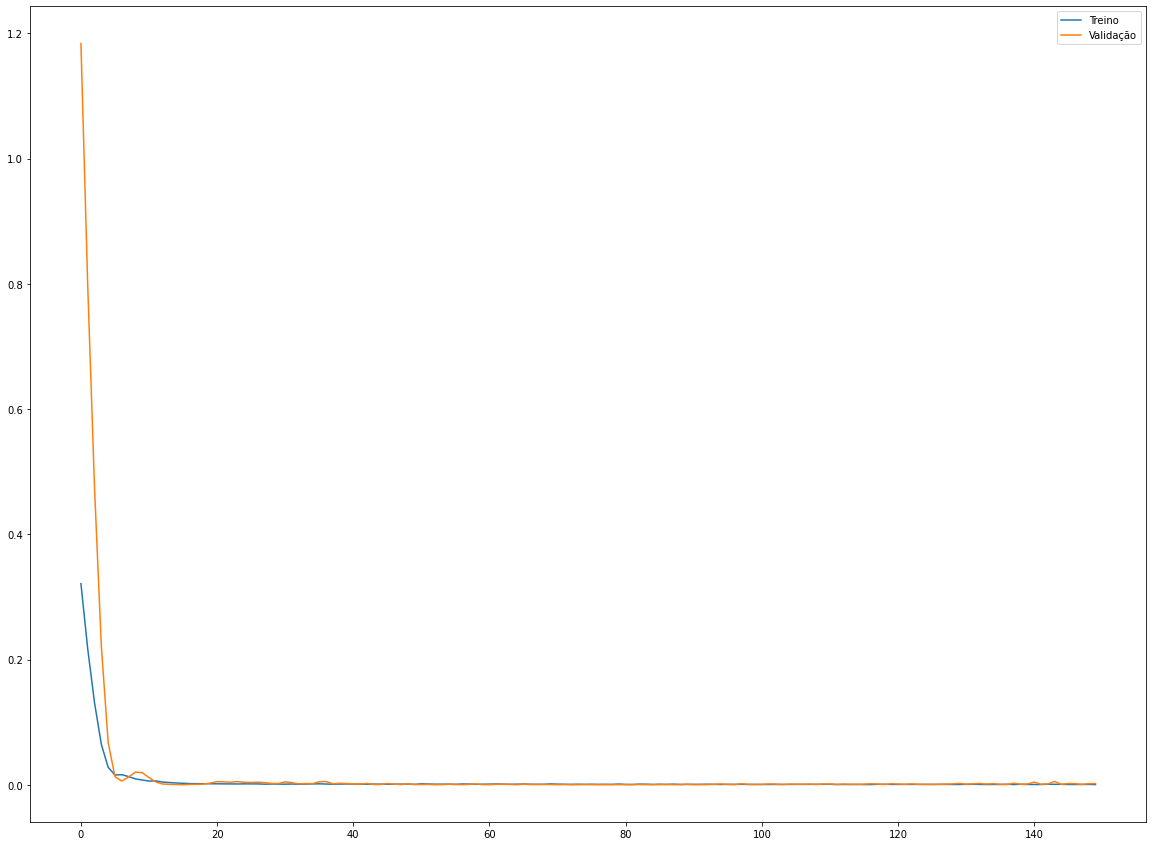

In [72]:
plt.plot( historico.history['loss'], label ="Treino" )
plt.plot( historico.history['val_loss'], label ="Validação" )
plt.legend()

In [73]:
y_predict_tend = regressor.predict(x_teste_3D_trend)

x = df_passageiros['Month'][-len(y_teste_trend):]
y_real = y_teste_trend
y_pred = y_predict_tend.reshape(len(y_teste_trend),)

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y_real,
                    mode='lines+markers',
                    name='Real'))

fig.add_trace(go.Scatter(x=x, y=y_pred,
                    mode='lines+markers',
                    name='Previsão'))

fig.show()

In [74]:
borda= int(time_steps/2)

trend=y_teste_trend
trend=trend[borda:len(trend)-borda]
x=np.linspace(0,len(trend),len(trend))

p=np.polyfit(x,trend,3)
poly=np.poly1d(p)
print(poly)

trend_prev=poly(x)

            3             2
-1.228e-05 x + 0.0005408 x + 0.009484 x + 0.9985


In [75]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=trend,
                    mode='lines+markers',
                    name='Real'))

fig.add_trace(go.Scatter(x=x, y=trend_prev,
                    mode='lines+markers',
                    name='Previsão'))

fig.show()

## Decompondo e Treinando - Residual

In [76]:
df_pass_dec_resid = pd.Series(data = resultado_dec_mul.resid, name = 'resid')

In [77]:
#Dropando valores nulos
df_pass_dec_resid.dropna(inplace = True)
df_pass_dec_resid.unique()

array([0.95166432, 0.95340141, 1.00221977, 1.00402777, 1.0062701 ,
       1.01181192, 0.96260299, 1.07146681, 1.03744743, 1.0140476 ,
       0.92690297, 0.96504062, 0.98355656, 0.97337205, 1.02250473,
       0.97219282, 0.93895274, 1.00679136, 1.0138446 , 1.06401802,
       1.0918541 , 1.01766508, 1.05158254, 0.9460444 , 0.94740414,
       0.93975991, 0.98886374, 0.99388085, 1.0235337 , 1.02508244,
       1.02588139, 1.09396957, 1.01347341, 0.96955964, 0.96326725,
       1.00037354, 0.94685624, 0.99311706, 0.97463021, 1.00466865,
       1.02027971, 1.01154067, 0.99766844, 1.01516463, 1.06046444,
       1.08023272, 1.04133292, 0.97180563, 0.9551933 , 0.98949892,
       0.99343371, 1.01926796, 1.00093923, 0.99150389, 0.98297846,
       0.92320316, 1.00444168, 0.99438988, 1.01194791, 0.99787403,
       1.02377529, 0.98451837, 0.98810363, 0.9927613 , 0.99951431,
       0.9908692 , 1.01540456, 0.98882409, 0.97758445, 1.00157323,
       0.98787554, 1.00396353, 1.03855123, 0.98311171, 1.00325

In [78]:
time_steps = 4
n_treino = 105
df_treino_set_resid = df_pass_dec_resid[:n_treino]
df_teste_set_resid = df_pass_dec_resid[ n_treino - time_steps:]

In [79]:
df_treino_set_resid[-5:]

106    1.021300
107    1.000526
108    0.995421
109    0.952276
110    0.946911
Name: resid, dtype: float64

In [80]:
df_teste_set_resid[:5]

107    1.000526
108    0.995421
109    0.952276
110    0.946911
111    0.938399
Name: resid, dtype: float64

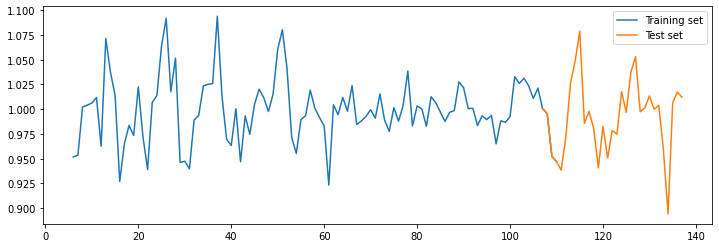

In [81]:
#Grafico
df_treino_set_resid.plot( figsize=(12,4), legend=True )
df_teste_set_resid.plot(legend=True)
plt.legend( ['Training set' , 'Test set' ] )

In [82]:
treino_array_resid = df_treino_set_resid.values
teste_array_resid = df_teste_set_resid.values

In [83]:
treino_set_resid = treino_array_resid.reshape(-1, 1)
teste_set_resid = teste_array_resid.reshape(-1, 1)

In [84]:
from sklearn.preprocessing import MinMaxScaler

sc =  MinMaxScaler( feature_range=(0,1) )

treino_set_norm_resid = sc.fit_transform(treino_set_resid)
teste_set_norm_resid = sc.transform(teste_set_resid)

In [85]:
n_samples = treino_set_resid.size

x_treino_resid = []
y_treino_resid = []

for i in range( time_steps, n_samples ):
                                # linhas              # colunas
    x_treino_resid.append( treino_set_norm_resid[ (i - time_steps):i , 0 ]  )
    y_treino_resid.append( treino_set_norm_resid[ i, 0] )

x_treino_resid = np.array(x_treino_resid)
y_treino_resid = np.array(y_treino_resid)

In [86]:
n_samples = teste_set_norm_resid.size

x_teste_resid = []
y_teste_resid = []

for i in range( time_steps, n_samples ):
                                # linhas              # colunas
    x_teste_resid.append( teste_set_norm_resid[ (i - time_steps):i , 0 ]  )
    y_teste_resid.append( teste_set_norm_resid[ i,0] )

x_teste_resid = np.array(x_teste_resid)
y_teste_resid = np.array(y_teste_resid)

In [87]:
n_features = 1
x_treino_3D_resid = np.reshape( x_treino_resid, (x_treino_resid.shape[0], x_treino_resid.shape[1], n_features) )
x_teste_3D_resid = np.reshape( x_teste_resid, (x_teste_resid.shape[0], x_teste_resid.shape[1], n_features) )
x_treino_3D_resid.shape

(101, 4, 1)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#call_es = EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)

# Estrutura da nossa rede
regressor = Sequential()
regressor.add( LSTM(units = 300, return_sequences = True, input_shape= (time_steps, n_features)))
regressor.add( Dropout(0.05) )
regressor.add( LSTM( units = 200, return_sequences = True)  )
regressor.add( Dropout(0.05) )
regressor.add( LSTM( units = 100 ) )
regressor.add( Dense(units=1) )

regressor.compile( optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'] )

historico = regressor.fit( x_treino_3D_resid, y_treino_resid, batch_size = 32, epochs = 200, validation_data=(x_teste_3D_resid, y_teste_resid))

Epoch 1/200
4/4 [==============================] - 7s 519ms/step - loss: 0.2095 - mse: 0.2095 - mae: 0.4166 - val_loss: 0.1267 - val_mse: 0.1267 - val_mae: 0.3046
Epoch 2/200
4/4 [==============================] - 0s 50ms/step - loss: 0.0862 - mse: 0.0862 - mae: 0.2402 - val_loss: 0.1003 - val_mse: 0.1003 - val_mae: 0.2623
Epoch 3/200
4/4 [==============================] - 0s 57ms/step - loss: 0.0765 - mse: 0.0765 - mae: 0.2132 - val_loss: 0.0663 - val_mse: 0.0663 - val_mae: 0.1991
Epoch 4/200
4/4 [==============================] - 0s 57ms/step - loss: 0.0461 - mse: 0.0461 - mae: 0.1647 - val_loss: 0.0722 - val_mse: 0.0722 - val_mae: 0.2128
Epoch 5/200
4/4 [==============================] - 0s 55ms/step - loss: 0.0581 - mse: 0.0581 - mae: 0.1966 - val_loss: 0.0686 - val_mse: 0.0686 - val_mae: 0.2048
Epoch 6/200
4/4 [==============================] - 0s 62ms/step - loss: 0.0490 - mse: 0.0490 - mae: 0.1743 - val_loss: 0.0594 - val_mse: 0.0594 - val_mae: 0.1840
Epoch 7/200
4/4 [==========

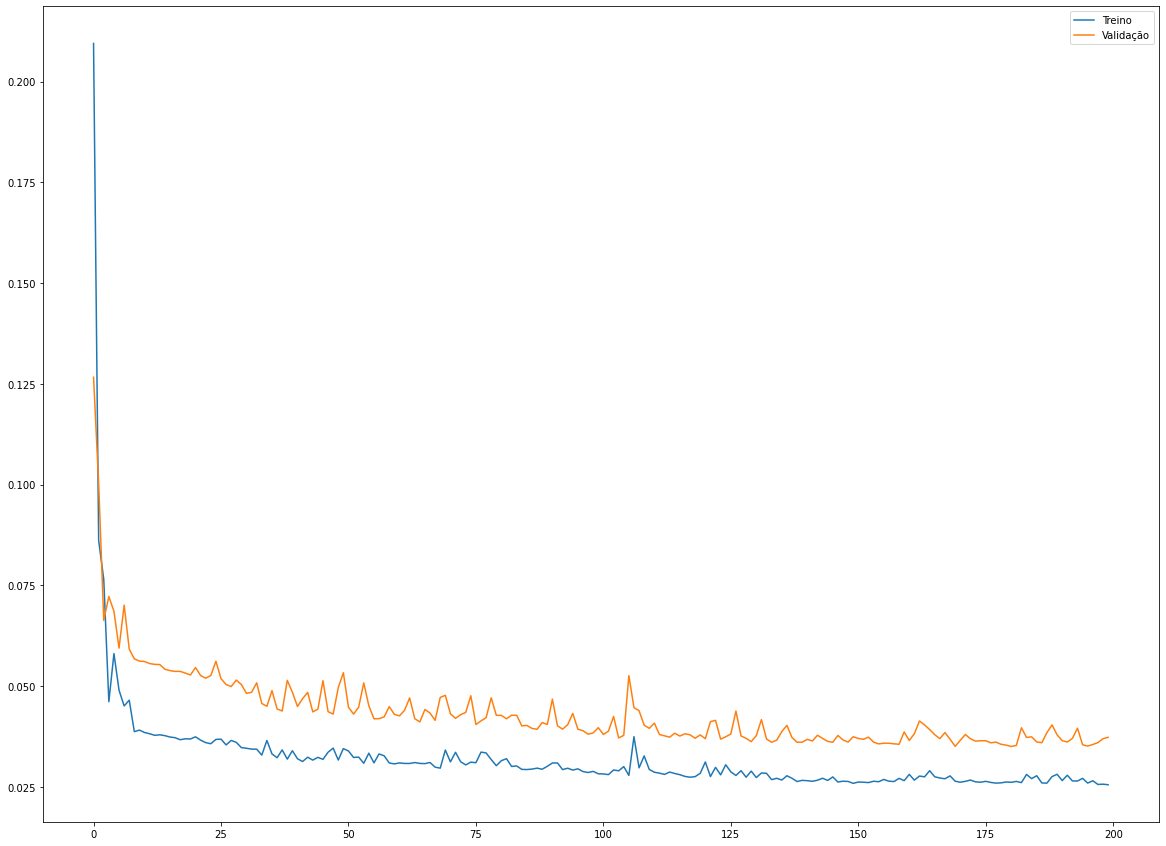

In [89]:
plt.plot( historico.history['loss'], label ="Treino" )
plt.plot( historico.history['val_loss'], label ="Validação" )
plt.legend()

In [90]:
y_predict_resid = regressor.predict(x_teste_3D_resid)

x = df_passageiros['Month'][-len(y_teste_resid):]
y_real = y_teste_resid
y_pred = y_predict_resid.reshape(len(y_teste_resid),)
# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y_real,
                    mode='lines+markers',
                    name='Real'))

fig.add_trace(go.Scatter(x=x, y=y_pred,
                    mode='lines+markers',
                    name='Previsão'))

fig.show()

## Juntando tudo

In [91]:
##y(t) = sazonalidade * tendencia *residual

In [92]:
y_predict_resid.shape, y_predict_saz.shape, y_predict_tend.shape
#tds tem q ter o mesmo shape

((27, 1), (27, 1), (27, 1))

In [93]:
y_teste_resid.shape, y_teste_saz.shape, y_teste_trend.shape

((27,), (27,), (27,))

In [94]:
y_pred = np.multiply(np.multiply(y_predict_resid, y_predict_tend),y_predict_saz)
y_test = np.multiply(np.multiply(y_teste_resid, y_teste_saz),y_teste_trend)


#y_pred = np.multiply(y_predict_saz, y_predict_tend)
#y_test = np.multiply(y_teste_trend, y_teste_saz)



In [95]:
x = df_passageiros['Month'][-len(y_test):]
y_real = y_test
y_pred = y_pred.reshape(len(y_test),)

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x = x, y = y_real,

                    mode='lines+markers',

                    name='Real'))

fig.add_trace(go.Scatter(x = x, y = y_pred,

                    mode='lines+markers',

                    name='Previsão'))


#saz
fig.add_trace(go.Scatter(x = df_passageiros['Month'][-len(y_teste_saz):], y = y_teste_saz,

                    mode='lines+markers',

                    name='real saz'))


#tend

fig.add_trace(go.Scatter(x = df_passageiros['Month'][-len(y_teste_trend):], y = y_teste_trend,

                    mode='lines+markers',

                    name='real trend'))


fig.show()

# Month Value 1

In [97]:
x = df_month_value.dropna().Period
y = df_month_value.dropna().Revenue

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines+markers',
                    name='lines+markers'))

fig.show()